In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#manipulator param
j1j2 = 17;
j2j5 = 30;
j5j7 = 42;
j2j4 = 20.3;
j3j5 = 20.3;
j5j6 = 20;
fwd_link_length = j5j7;
rear_link_length = j2j5;

fwd_piston_max = 38; fwd_piston_min = 23;
rear_piston_max = 31; rear_piston_min = 21;
SAMPLES = 50;

fwd_piston_length = np.linspace(fwd_piston_min,fwd_piston_max,SAMPLES);
rear_piston_length = np.linspace(rear_piston_min,rear_piston_max,SAMPLES);
piston_length = np.array([]);
for i in range(len(fwd_piston_length)):
    for j in range(len(rear_piston_length)):
        piston_length = np.append(piston_length,[fwd_piston_length[i],rear_piston_length[j]], axis = 0);
piston_length = piston_length.reshape((SAMPLES**2,2));

In [3]:
def getJointAngles(piston_length):
    front_piston = piston_length[0:len(piston_length),0];
    rear_piston = piston_length[0:len(piston_length),1];
    return [np.pi-np.arccos((j1j2**2 + j2j4**2 - rear_piston**2)/(2*j1j2*j2j4)),
            np.pi-np.arccos((j3j5**2 + j5j6**2 - front_piston**2)/(2*j3j5*j5j6))];

In [4]:
def direct_kinematics(fwd_angle, rear_angle, fwd_link_length, rear_link_length):
    return [rear_link_length*np.cos(rear_angle)+fwd_link_length*np.cos(fwd_angle+rear_angle), rear_link_length*np.sin(rear_angle)+fwd_link_length*np.sin(fwd_angle+rear_angle)]
    #return np.array([[ np.cos(fwd_angle+rear_angle), -np.sin(fwd_angle+rear_angle), 0, rear_link_length*np.cos(rear_angle)+fwd_link_length*np.cos(fwd_angle+rear_angle)],
    #                 [ np.sin(fwd_angle+rear_angle),  np.cos(fwd_angle+rear_angle), 0, rear_link_length*np.sin(rear_angle)+fwd_link_length*np.sin(fwd_angle+rear_angle)],
    #                 [ 0                           ,  0                           , 1, 0  ],
    #                 [ 0                           ,  0                           , 0, 1  ]]);

In [5]:
[fwd_angle, rear_angle] = getJointAngles(piston_length);

In [6]:
[x,y]=direct_kinematics(fwd_angle,rear_angle,fwd_link_length,rear_link_length);

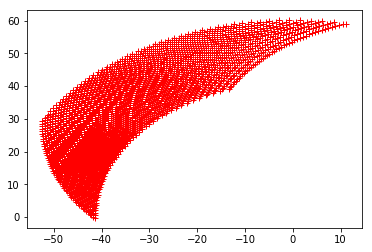

In [7]:
plt.plot(x,y,'r+');